In [1]:
import pandas as pd
import numpy as np
import palettable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "arial" 

In [2]:
from comut import comut

In [3]:
from comut import fileparsers

In [4]:
data = pd.read_csv('../Figures/Figure1/comut_collapsed_added.txt', sep = '\t')
data.tail(5)

,Unnamed: 0,Sample,SampleName,Patient,Cohort,Chemistry,Treated,IO,TKI,IO_Treated,Biopsy,Stage_Corrected,Location,Histology,Sex,Age,Grade,Age_Categorical,Patient_Numeric
37,38,IpiNivo_Mixed_Near,IpiNivo_Mixed_Near,IpiNivo_Mixed,Krishna,5prime,Yes,Yes,No,IO Exposed,Kidney,IV,Near,ccRCC,Male,64.0,NaN,60-70,25
38,39,IpiNivo_Resistant_Center,IpiNivo_Resistant_Center,IpiNivo_Resistant,Krishna,5prime,Yes,Yes,No,IO Exposed,Kidney,IV,Center,ccRCC,Male,50.0,NaN,50-60,26
39,40,IpiNivo_Resistant_Far,IpiNivo_Resistant_Far,IpiNivo_Resistant,Krishna,5prime,Yes,Yes,No,IO Exposed,Kidney,IV,Far,ccRCC,Male,50.0,NaN,50-60,26
40,41,IpiNivo_Resistant_LymphNode,IpiNivo_Resistant_LymphNode,IpiNivo_Resistant,Krishna,5prime,Yes,Yes,No,IO Exposed,Lymph_node,IV,Met,ccRCC,Male,50.0,NaN,50-60,26
41,42,IpiNivo_Resistant_Near,IpiNivo_Resistant_Near,IpiNivo_Resistant,Krishna,5prime,Yes,Yes,No,IO Exposed,Kidney,IV,Near,ccRCC,Male,50.0,NaN,50-60,26


In [5]:
Biopsy = data[['Sample','Biopsy']]
Biopsy = Biopsy.rename(columns={'Sample': 'sample', 'Biopsy': 'value'}) 
Biopsy['category'] = 'Biopsy Site'
Biopsy.head(3)

Biopsy_mapping = {'Abdomen':'#66C2A5','Adrenal':'#FC8D62','Kidney':'#8DA0CB','Lung':'#E78AC3','Lymph_node':'#A6D854','Renal_vein_tumor_thrombus':'#FFD92F'}
Biopsy_mapping

{'Abdomen': '#66C2A5',
 'Adrenal': '#FC8D62',
 'Kidney': '#8DA0CB',
 'Lung': '#E78AC3',
 'Lymph_node': '#A6D854',
 'Renal_vein_tumor_thrombus': '#FFD92F'}

In [6]:
Stage_Corrected = data[['Sample','Stage_Corrected']]
Stage_Corrected = Stage_Corrected.rename(columns={'Sample': 'sample', 'Stage_Corrected': 'value'}) 
Stage_Corrected['category'] = 'Stage_Corrected'
Stage_Corrected.head(3)

Stage_Corrected_mapping = {'I':'#fcf9ce','II':'#a3d6b3','III':'#40b6c4','IV':'#225fa9'}

In [7]:
Grade = data[['Sample','Grade']]
Grade = Grade.rename(columns={'Sample': 'sample', 'Grade': 'value'}) 
Grade['category'] = 'Grade'
Grade['value'] = Grade.value.astype('str')
Grade.head(3)

Grade_mapping = {'2.0':"#fde0dd","3.0":"#fa9fb5","4.0":"#c51b8a","nan":"#d9d9d9"}

In [8]:
Age_Categorical = data[['Sample','Age_Categorical']]
Age_Categorical = Age_Categorical.rename(columns={'Sample': 'sample', 'Age_Categorical': 'value'}) 
Age_Categorical['category'] = 'Age_Categorical'
Age_Categorical['value'] = Age_Categorical.value.astype('str')
Age_Categorical.head(3)

Age_Categorical_mapping = {'40-50':"#edf8fb","50-60":"#b3cde3","60-70":"#8c96c6","70+":"#88419d"}

In [9]:
Sex = data[['Sample','Sex']]
Sex = Sex.rename(columns={'Sample': 'sample', 'Sex': 'value'}) 
Sex['category'] = 'Sex'
Sex['value'] = Sex.value.astype('str')
Sex.head(3)

Sex_mapping = {'Male':"#fee5d9","Female":"#cb181d"}

In [10]:
IO_Treated = data[['Sample','IO_Treated']]
IO_Treated = IO_Treated.rename(columns={'Sample': 'sample', 'IO_Treated': 'value'}) 
IO_Treated['category'] = 'IO_Treated'
IO_Treated['value'] = IO_Treated.value.astype('str')
IO_Treated.head(3)

IO_Treated_mapping = {'IO Naive':'#f7f7f7','IO Exposed':'#252525'}

In [11]:
TKI = data[['Sample','TKI']]
TKI = TKI.rename(columns={'Sample': 'sample', 'TKI': 'value'}) 
TKI['category'] = 'TKI'
TKI['value'] = TKI.value.astype('str')
TKI.head(3)

TKI_mapping = {'No':'#f7f7f7','Yes':"#993404"}

##ffffd4

In [12]:
Cohort = data[['Sample','Cohort']]
Cohort = Cohort.rename(columns={'Sample': 'sample', 'Cohort': 'value'}) 
Cohort['category'] = 'Cohort'
Cohort['value'] = Cohort.value.astype('str')
Cohort.head(3)

Cohort_mapping = {'Bi':"#e21e26","Braun":"#262262","Krishna":"#4eaf49"}

In [13]:
Patient_Numeric = data[['Sample','Patient_Numeric']]
Patient_Numeric = Patient_Numeric.rename(columns={'Sample': 'sample', 'Patient_Numeric': 'group'}) 
Patient_Numeric.head(3)

,sample,group
0,Bi_DFCI_0600890_T1,2
1,Bi_0600915_T1_TrueTumor,8
2,Bi_DFCI_0600876_T1,1


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


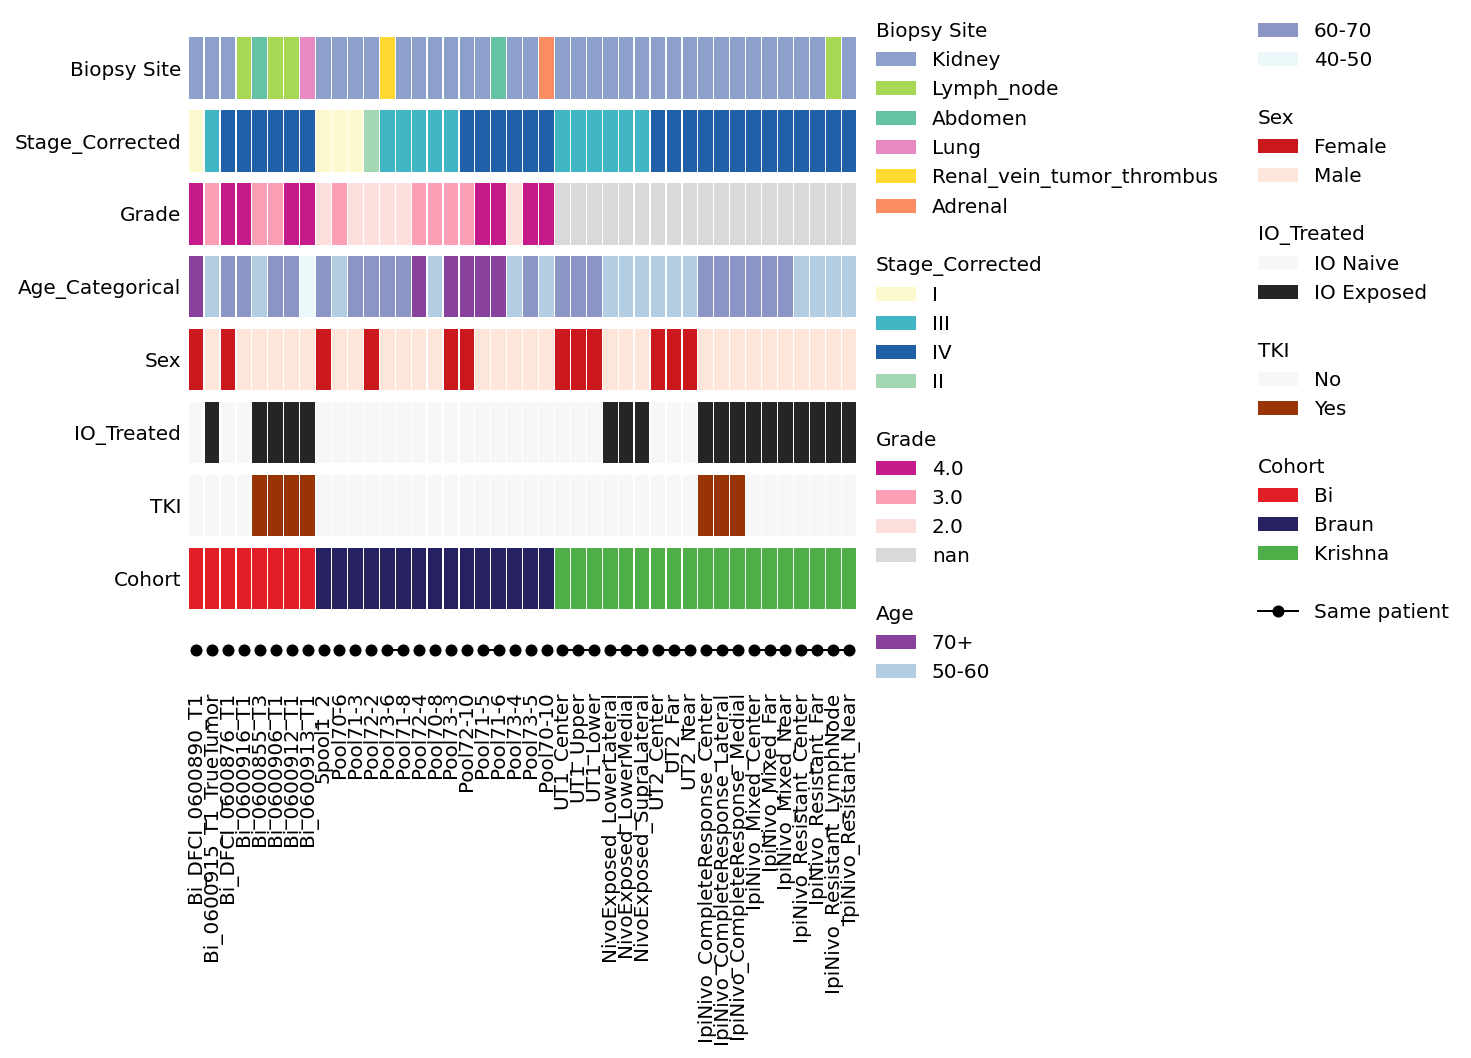

In [14]:
toy_comut = comut.CoMut()
toy_comut.samples = data["Sample"]

# add indicators first, since they will be at the bottom
indicator_kwargs = {'color': 'black', 'marker': 'o', 'linewidth': 1, 'markersize': 5}
toy_comut.add_sample_indicators(Patient_Numeric, name = 'Same patient', plot_kwargs = indicator_kwargs)

# add other data
toy_comut.add_categorical_data(Cohort, name = 'Cohort',mapping = Cohort_mapping)
toy_comut.add_categorical_data(TKI, name = 'TKI', mapping = TKI_mapping)
toy_comut.add_categorical_data(IO_Treated, name = 'IO_Treated',mapping = IO_Treated_mapping)
toy_comut.add_categorical_data(Sex, name = 'Sex',mapping = Sex_mapping)
toy_comut.add_categorical_data(Age_Categorical, name = 'Age',mapping = Age_Categorical_mapping)
toy_comut.add_categorical_data(Grade, name = 'Grade',mapping = Grade_mapping)
toy_comut.add_categorical_data(Stage_Corrected, name = 'Stage_Corrected', mapping = Stage_Corrected_mapping)
toy_comut.add_categorical_data(Biopsy, name = 'Biopsy Site',mapping = Biopsy_mapping)

toy_comut.plot_comut(figsize = (6, 6), x_padding = 0.04, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05)
#toy_comut.add_unified_legend()

toy_comut.add_unified_legend(bbox_to_anchor = (1, 1.4), ncol = 2)

In [15]:
toy_comut.figure.savefig('../Figures/Figure1/Figure1B_Comut.svg', bbox_inches = 'tight', dpi = 300)